## Example of computing depth from stereo vision

The images are from a nice collection of 3D calibration images
at https://vision.middlebury.edu/stereo/data/

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im1 = cv2.imread(os.path.relpath('../../Data/tsukuba/scene1.row3.col1.ppm'), cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(os.path.relpath('../../Data/tsukuba/scene1.row3.col2.ppm'), cv2.IMREAD_GRAYSCALE)

# note, if we use images that are too far apart (e.g. column 1 and 5), we get terrible results


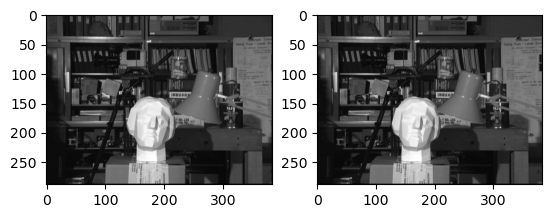

In [3]:
plt.subplot(121); plt.imshow(im1,cmap='gray')
plt.subplot(122); plt.imshow(im2,cmap='gray')


In [9]:
# Create a StereoBM object

#comparing the sum of absolute differences (SAD) of each 'block' of pixels
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

#  semi-global block matching
stereo2 = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)


#setNumDisparities: Sets the number of disparities to search for. Must be a multiple of 16.
#setBlockSize: Sets the size of the blocks used for matching.

# truncates disparity outside of this range
stereo2.setPreFilterCap(63)



Text(0.5, 1.0, 'disparity')

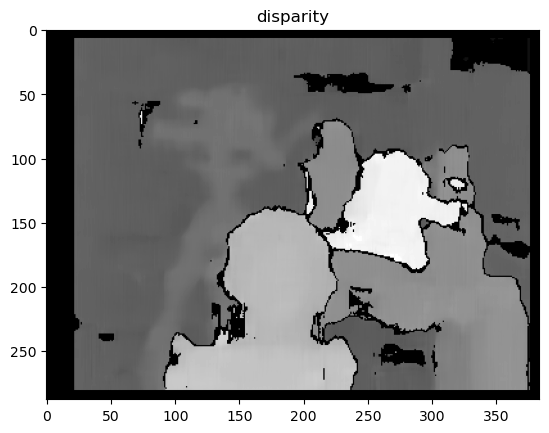

In [10]:
# Compute the disparity map
disparity = stereo.compute(im1, im2)

# Normalize the disparity map for display
disparity = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)

# Display the disparity map
plt.imshow(disparity,cmap='gray'); plt.title('disparity')

